In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

$$\mathbf{x} = \begin{bmatrix}1\\2\\3\\\vdots\\n\end{bmatrix}$$

In [2]:
# IGNORE
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color'] * 2

def draw_vectors(*vectors, **kwargs):
    X = np.vstack(vectors)
    fig, ax = plt.subplots()
    for i, v in enumerate(X):
        ax.arrow(0, 0, *v, color=COLORS[i], length_includes_head=True,
                 width=0.03, head_width=0.1)
    xmax, ymax = np.abs(X.max(0))
    ax.axis([-xmax - 1, xmax + 1, -ymax -1, ymax + 1])
    ax.set_aspect('equal')

# Vectors as Positions in Space

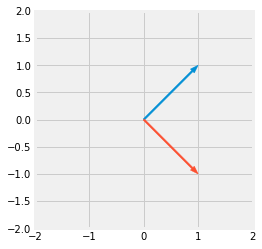

In [3]:
x = np.array([1, 1])
y = np.array([1, -1])
draw_vectors(x, y)

# Matrices as collections of Vectors

In [4]:
pi = np.pi

X = np.array([
    [np.cos(0),          np.sin(0)         ],
    [np.cos(pi / 4),     np.sin(pi / 4)    ],
    [np.cos(pi / 2),     np.sin(pi / 2)    ],
    [np.cos(3 * pi / 4), np.sin(3 * pi / 4)],
    [np.cos(pi),         np.sin(pi)        ],
    [np.cos(5 * pi / 4), np.sin(5 * pi / 4)],
    [np.cos(3 * pi / 2), np.sin(3 * pi / 2)],
    [np.cos(7 * pi / 4), np.sin(7 * pi / 4)]
])
draw_vectors(*X)
plt.gca().set_aspect('equal')

-----
## Question: What is the shape of a matrix that represents 3 points on a graph paper?

## Exercise: Create a matrix containing any two 2D vectors which are orthogonal, and draw them with the `draw_vectors` function.

In [19]:
df = pd.read_csv('exercise_data.csv')

In [20]:
df.head()

var-1  var-2
0      2     43
1      4     67
2      7     34
3      3     98
4      4     67

In [21]:
df.describe()

var-1      var-2
count  12.000000  12.000000
mean    4.583333  49.333333
std     2.314316  25.137199
min     1.000000  19.000000
25%     3.000000  32.250000
50%     4.000000  41.500000
75%     6.250000  67.000000
max     9.000000  98.000000

In [24]:
C = np.cov(df['var-1'], df['var-2'])
C

array([[  5.35606061,   3.15151515],
       [  3.15151515, 631.87878788]])

<AxesSubplot:xlabel='Height', ylabel='Weight'>

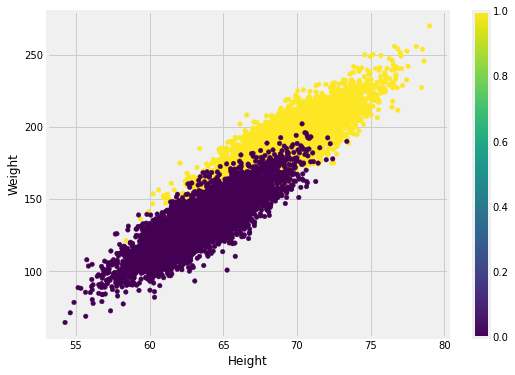

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
df['genc'] = df['Gender'] == 'Male'
df.plot.scatter('Height', 'Weight', c=df['genc'].astype(int), ax=ax, cmap= plt.cm.viridis)

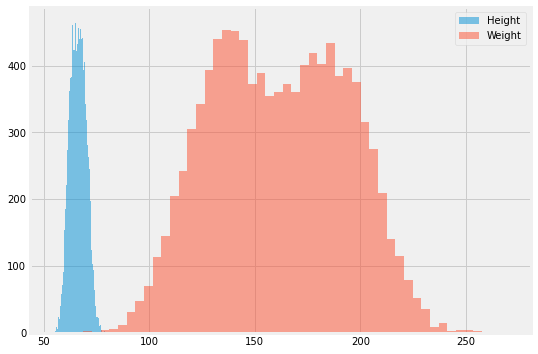

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
df['Height'].hist(bins=50, ax=ax, alpha=0.5, label='Height')
df['Weight'].hist(bins=50, ax=ax, alpha=0.5, label='Weight')
plt.legend()

In [11]:
np.cov(df['Height'], df['Weight'])

array([[  14.80347264,  114.24265645],
       [ 114.24265645, 1030.95185544]])

In [12]:
def get_rotation_matrix(theta):  # in RADIANS!
    return np.array([[np.cos(theta), - np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])

In [13]:
# Normalize the data, so we are rotating about the origin
X = df[['Height', 'Weight']].values
xCent = X - X.mean(axis=0)
xNorm = xCent / xCent.std(axis=0)

# put it back into the dataframe
df['hnorm'] = xNorm[:, 0]
df['wnorm'] = xNorm[:, 1]

In [14]:
males = df[df['Gender'] == 'Male']
X = males[['hnorm', 'wnorm']].values
females = df[df['Gender'] == 'Female']
Y = females[['hnorm', 'wnorm']].values

In [16]:
rotator_90 = get_rotation_matrix(np.pi / 2)

In [17]:
xrot = np.dot(rotator_90, X.T)

In [18]:
newData = np.r_[xrot.T, Y]
np.cov(newData.T)

array([[ 0.43811275, -0.06076481],
       [-0.06076481,  1.00585732]])

In [3]:
M=np.array([25,28]).T
M

array([25, 28])

In [4]:
M=np.linalg.inv(M)

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [28]:
M

array([[-2. ,  1.5],
       [ 1. , -0.5]])